In [1]:
%matplotlib inline

from os.path import basename, join
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as mph
import skimage.io as io

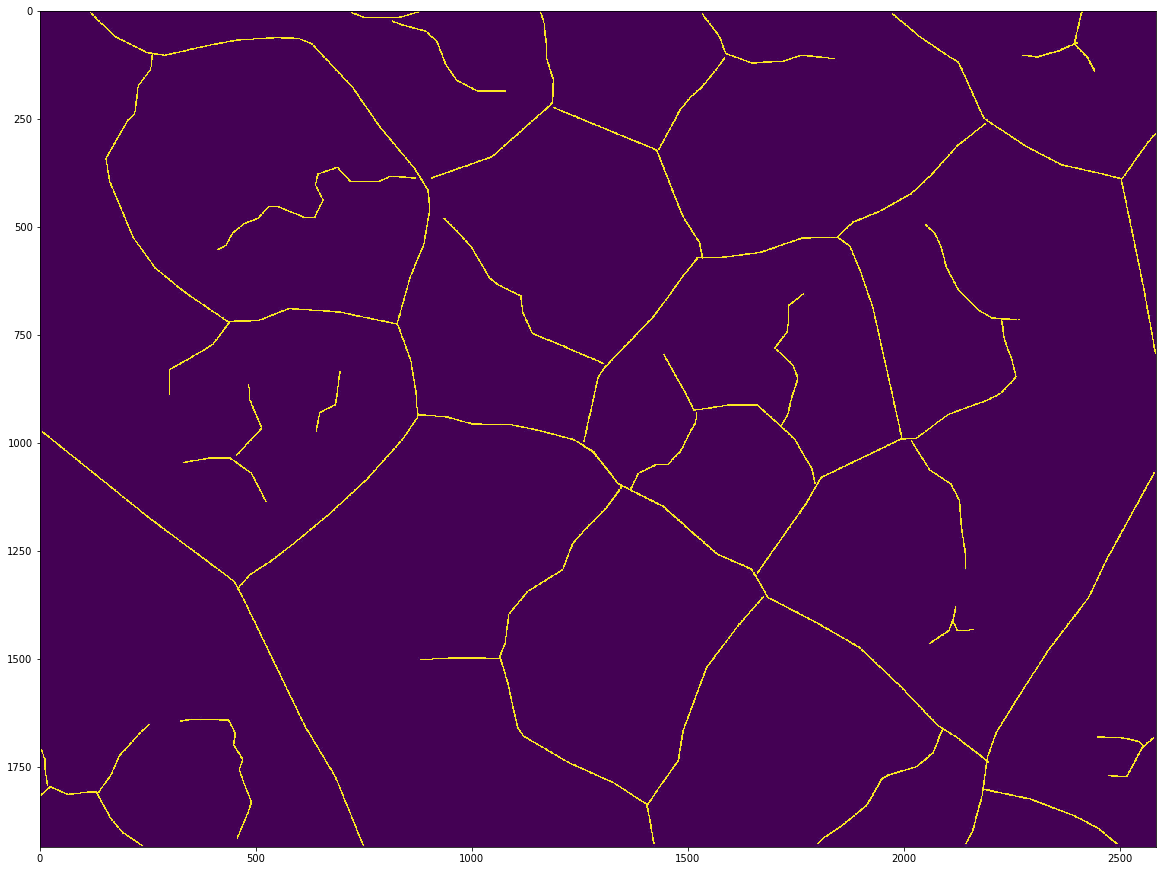

In [65]:
import os
cwd = os.getcwd()

dataset_folder = '../data/raw/Veins machine learning with Chris/'
test_img = io.imread(join(dataset_folder,'Veins skeleton','102-8_traced.jpg'), as_gray=True)

plt.figure(figsize=(20,20))
plt.imshow(test_img)

82559


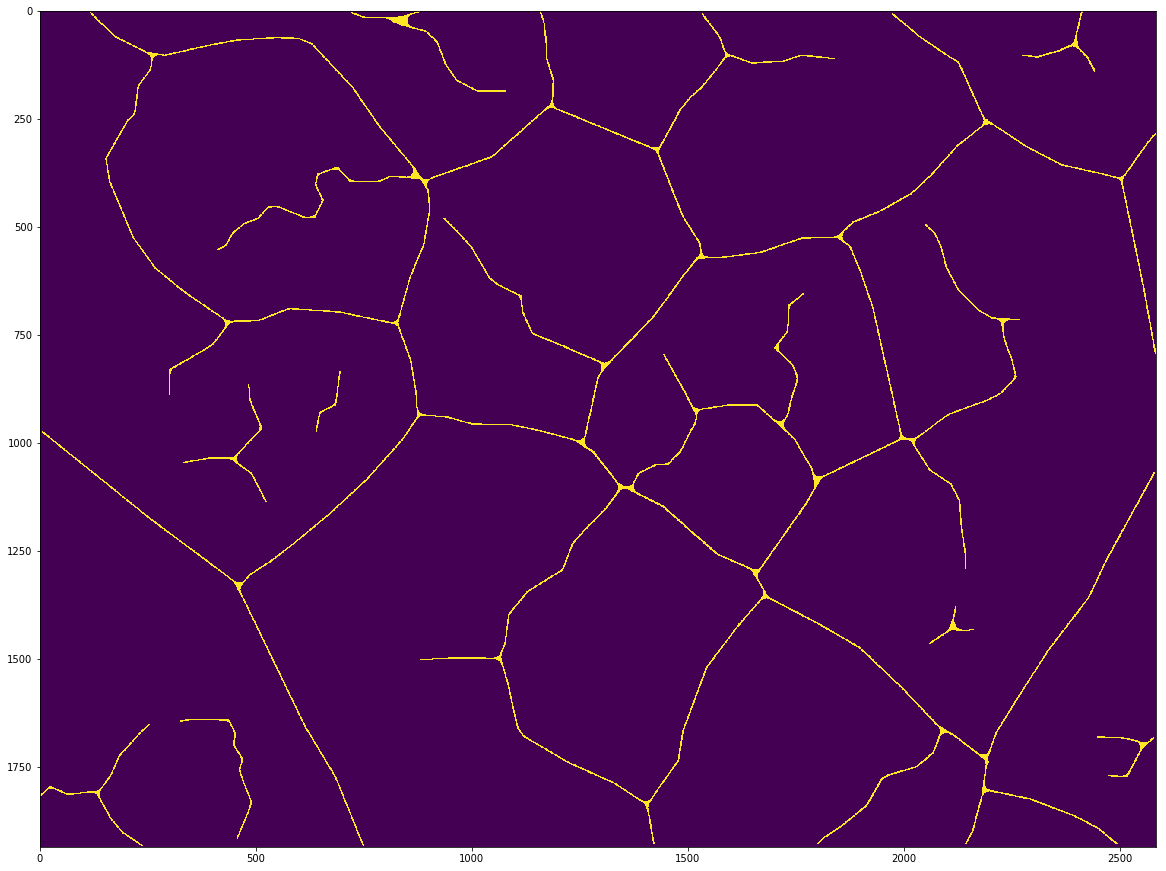

In [66]:
from skimage.util import pad


#seg = mph.binary_erosion(seg, mph.disk(5))
seg = test_img > 200
seg = mph.remove_small_objects(seg,500)
seg = mph.binary_closing(pad(seg,(20,20),mode='constant'), mph.disk(15))
seg = seg[20:-20,20:-20]
print(np.sum(seg))

plt.figure(figsize=(20,20))
plt.imshow(seg)

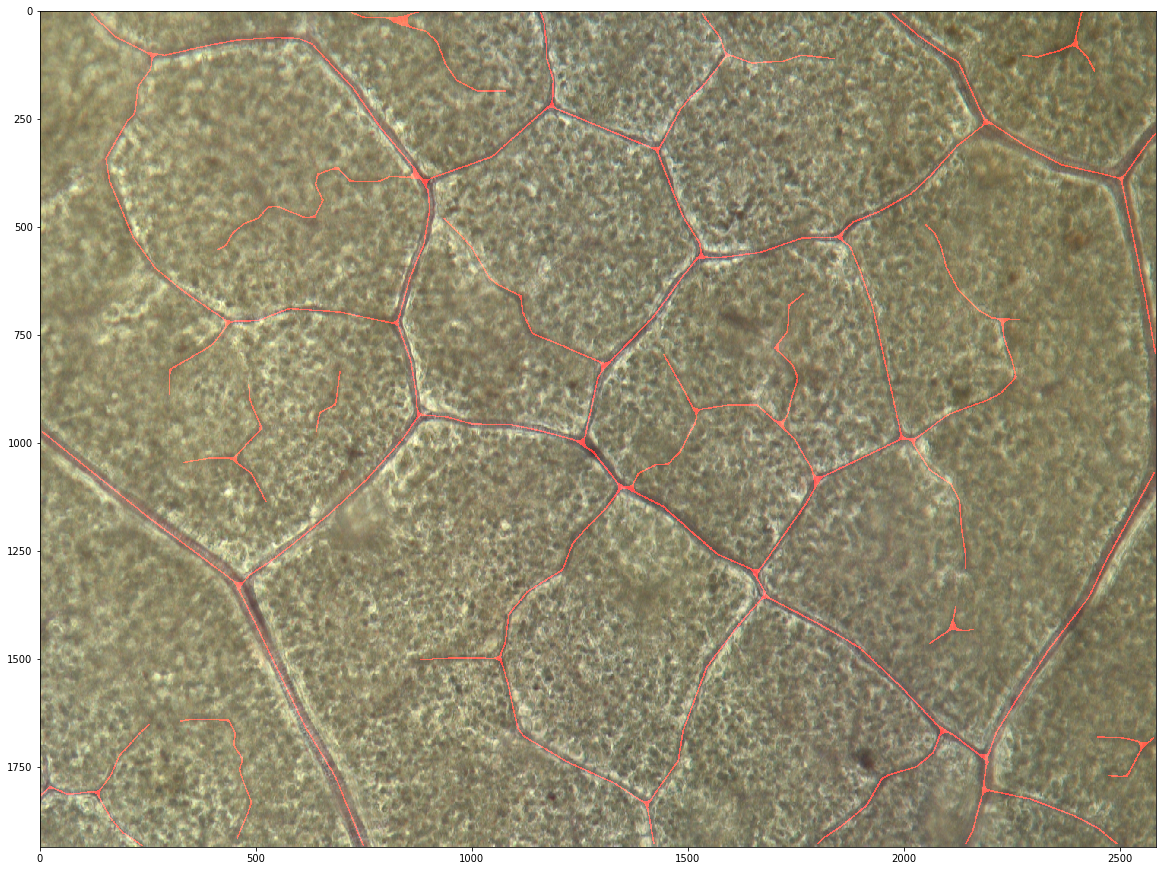

In [67]:
real_img = io.imread(join(dataset_folder,'Untraced Veins','102-8.jpeg'))

# print(seg.shape)
# print(real_img.shape)
mask = np.where(seg)

real_img[mask[0],mask[1],0] = 255
plt.figure(figsize=(20,20))
plt.imshow(real_img)